In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
!pip install pycaret

In [3]:
conda config --append channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install scikit-learn=0.23.2

^C

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pycaret.classification import * 

In [6]:
pycaret.__version__

'2.3.5'

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
y = train['Survived']

In [10]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


In [11]:
train_test = pd.concat([train,test],ignore_index=True)

In [12]:
train_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


data exploration

In [13]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

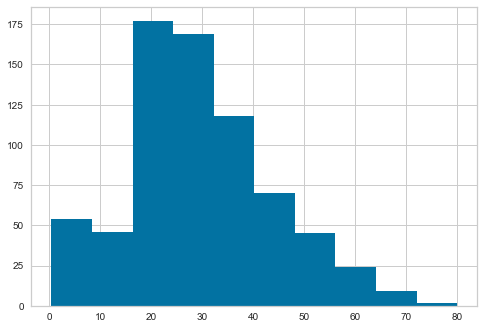

In [14]:
plt.hist(train['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

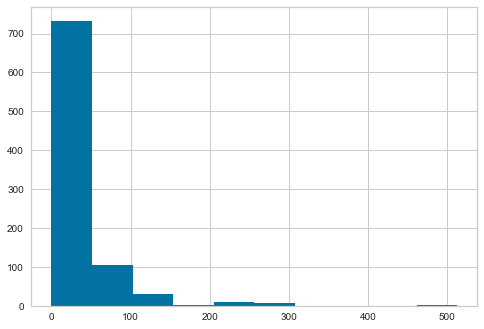

In [15]:
plt.hist(train['Fare'])

<AxesSubplot:ylabel='Embarked'>

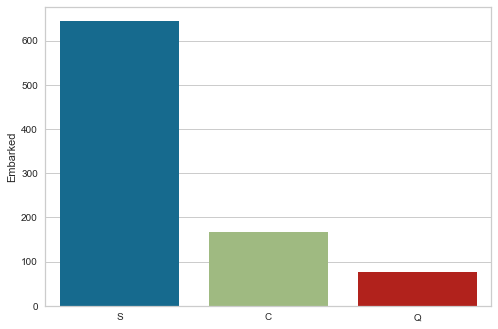

In [16]:
sns.barplot(train['Embarked'].value_counts().index,train['Embarked'].value_counts())

Data cleaning

In [17]:
# Cabin has lots of null data
# fillna data

In [18]:
train_test['Embarked'] = train_test['Embarked'].fillna(train_test['Embarked'].mode()[0])

In [19]:
train_test['Fare'] = train_test['Fare'].fillna(train_test['Fare'].mode()[0])

In [20]:
train_test['Age'] = train_test['Age'].fillna(train_test['Age'].median())

In [21]:
train_test['Family_size'] = train_test['SibSp'] + train_test['Parch'] +1

In [22]:
train_test.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Family_size'],
      dtype='object')

In [23]:
train_test['Pclass'] = train_test['Pclass'].astype(str)

In [24]:
df_num = train_test[['Age','SibSp','Parch','Fare','Family_size']]

In [25]:
df_obj = train_test[['Pclass','Name','Sex','Ticket','Cabin','Embarked']]

In [26]:
import scipy
from scipy.stats import skew

In [27]:
df_num.skew()

Age            0.540987
SibSp          3.844220
Parch          3.669078
Fare           4.369214
Family_size    2.853078
dtype: float64

In [28]:
skew_df = pd.DataFrame(df_num.columns, columns=['Feature'])
skew_df['Skew'] = df_num.skew().to_list()
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Age,0.540987,0.540987,True
1,SibSp,3.844220,3.844220,True
2,Parch,3.669078,3.669078,True
3,Fare,4.369214,4.369214,True
4,Family_size,2.853078,2.853078,True


These five features are skewed, log them.

In [29]:
for column in skew_df['Feature'].values:
    train_test[column] = np.log1p(train_test[column])

In [30]:
train_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,3.135494,0.693147,0.000000,A/5 21171,2.110213,NaN,S,1.098612
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.663562,0.693147,0.000000,PC 17599,4.280593,C85,C,1.098612
2,3,1.0,3,"Heikkinen, Miss. Laina",female,3.295837,0.000000,0.000000,STON/O2. 3101282,2.188856,NaN,S,0.693147
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.583519,0.693147,0.000000,113803,3.990834,C123,S,1.098612
4,5,0.0,3,"Allen, Mr. William Henry",male,3.583519,0.000000,0.000000,373450,2.202765,NaN,S,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,3.367296,0.000000,0.000000,A.5. 3236,2.202765,NaN,S,0.693147
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,3.688879,0.000000,0.000000,PC 17758,4.699571,C105,C,0.693147
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,3.676301,0.000000,0.000000,SOTON/O.Q. 3101262,2.110213,NaN,S,0.693147
1307,1308,NaN,3,"Ware, Mr. Frederick",male,3.367296,0.000000,0.000000,359309,2.202765,NaN,S,0.693147


numerical columns with survival correlation

In [31]:
for column in df_num.columns:
    print(column +'  '+ str(abs(train_test[column].corr(train_test['Survived']))))

Age  0.1160237280753327
SibSp  0.029429635964398262
Parch  0.11499882225988353
Fare  0.3298621286968071
Family_size  0.08522365669683694


In [32]:
# finsh looking at numerical columns

In [33]:
for column in df_obj:
    print(df_obj[column].value_counts())
    print('\n')

3    709
1    323
2    277
Name: Pclass, dtype: int64


Connolly, Miss. Kate                                     2
Kelly, Mr. James                                         2
Straus, Mrs. Isidor (Rosalie Ida Blun)                   1
Moran, Miss. Bertha                                      1
Frolicher-Stehli, Mr. Maxmillian                         1
                                                        ..
Botsford, Mr. William Hull                               1
Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)    1
Stanton, Mr. Samuel Ward                                 1
Phillips, Miss. Alice Frances Louisa                     1
Parr, Mr. William Henry Marsh                            1
Name: Name, Length: 1307, dtype: int64


male      843
female    466
Name: Sex, dtype: int64


CA. 2343              11
CA 2144                8
1601                   8
347082                 7
347077                 7
                      ..
3410                   1
STON/O2. 3101270       1


So many categories in Name, Ticket and Cabin, we can do feature enginerring on these

Embarked Pclass Sex are okay

Feature engineering

<BarContainer object of 3 artists>

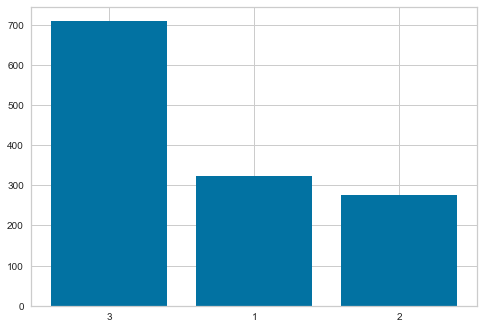

In [34]:
plt.bar(x=train_test['Pclass'].value_counts().index , height=train_test['Pclass'].value_counts())

In [35]:
pd.pivot_table(train_test,index='Survived',columns='Pclass', values = 'Name', aggfunc='count')

Pclass,1,2,3
Survived,,,
0.0,80,97,372
1.0,136,87,119


<BarContainer object of 3 artists>

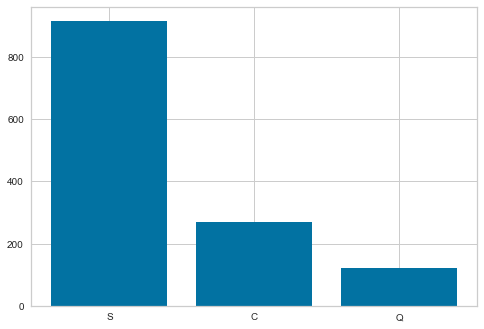

In [36]:
plt.bar(x=train_test['Embarked'].value_counts().index , height=train_test['Embarked'].value_counts())

In [37]:
pd.pivot_table(train_test,index='Survived',columns='Embarked', values = 'Name', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,219


<BarContainer object of 2 artists>

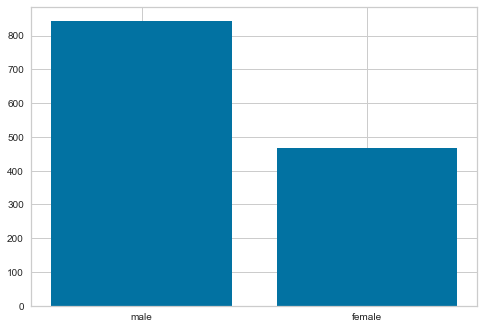

In [38]:
plt.bar(x=train_test['Sex'].value_counts().index , height=train_test['Sex'].value_counts())

In [39]:
pd.pivot_table(train_test,index='Survived',columns='Sex', values = 'Name', aggfunc='count')

Sex,female,male
Survived,,
0.0,81,468
1.0,233,109


Evaluate if cabin letter affects survival rate.
Evaluate if number of cabins affects survival rate.
Evaluate if ticket types affect survival rate. (Two patterns in Ticket column: pure number and str+number)
Does a person's title relate to survival rates?

In [40]:
train_test['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
#No cabin starts with 'n'

In [42]:
train_test['Cabin_first'] = train_test['Cabin'].astype(str).str[0]

<BarContainer object of 8 artists>

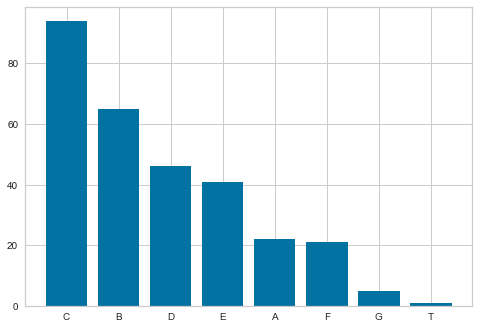

In [43]:
plt.bar(x=train_test['Cabin_first'].value_counts().index[1:] , height=train_test['Cabin_first'].value_counts()[1:])

In [44]:
print(train_test['Cabin_first'].value_counts())
pd.pivot_table(train_test,index='Survived',columns='Cabin_first', values = 'Name', aggfunc='count')

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_first, dtype: int64


Cabin_first,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [45]:
#does number of cabins affect survival rate

In [46]:
train_test['Cabin_number'] = train_test['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [47]:
print(train_test['Cabin_number'].value_counts())
pd.pivot_table(train_test,index='Survived',columns='Cabin_number', values = 'Name', aggfunc='count')

0    1014
1     254
2      26
3      10
4       5
Name: Cabin_number, dtype: int64


Cabin_number,0,1,2,3,4
Survived,,,,,
0.0,481.0,58.0,7.0,3.0,NaN
1.0,206.0,122.0,9.0,3.0,2.0


In [48]:
# underdstanding Ticket better
# Two patterns in Ticket colum: pure number and str+number
#                                 p0              p1

In [49]:
train_test['Ticket_pattern'] = train_test['Ticket'].apply(lambda x: 'p0' if x[0] in str(range(0,10)) else 'p1')

In [50]:
print(train_test['Ticket_pattern'].value_counts())
pd.pivot_table(train_test,index='Survived',columns='Ticket_pattern', values = 'Name', aggfunc='count')

p1    1099
p0     210
Name: Ticket_pattern, dtype: int64


Ticket_pattern,p0,p1
Survived,,
0.0,54,495
1.0,92,250


In [51]:
#Does Name title affect survival rate?

In [52]:
train_test['Name_title'] = train_test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [53]:
train_test['Name_title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name_title, Length: 1309, dtype: object

In [54]:
#plot name title vs survival

<BarContainer object of 18 artists>

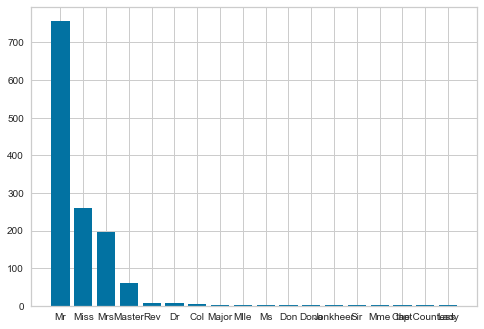

In [55]:
plt.bar(x=train_test['Name_title'].value_counts().index , height=train_test['Name_title'].value_counts())

In [56]:
pd.pivot_table(train_test,index='Survived',columns='Name_title', values = 'Name', aggfunc='count')

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [57]:
final_features = train_test.drop(columns = ['PassengerId','Name','Cabin','Ticket','Survived'])
final_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Cabin_first,Cabin_number,Ticket_pattern,Name_title
0,3,male,3.135494,0.693147,0.000000,2.110213,S,1.098612,n,0,p1,Mr
1,1,female,3.663562,0.693147,0.000000,4.280593,C,1.098612,C,1,p1,Mrs
2,3,female,3.295837,0.000000,0.000000,2.188856,S,0.693147,n,0,p1,Miss
3,1,female,3.583519,0.693147,0.000000,3.990834,S,1.098612,C,1,p0,Mrs
4,3,male,3.583519,0.000000,0.000000,2.202765,S,0.693147,n,0,p1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,3.367296,0.000000,0.000000,2.202765,S,0.693147,n,0,p1,Mr
1305,1,female,3.688879,0.000000,0.000000,4.699571,C,0.693147,C,1,p1,Dona
1306,3,male,3.676301,0.000000,0.000000,2.110213,S,0.693147,n,0,p1,Mr
1307,3,male,3.367296,0.000000,0.000000,2.202765,S,0.693147,n,0,p1,Mr


In [58]:
final_features = pd.get_dummies(final_features).reset_index(drop=True)
final_features

,Age,SibSp,Parch,Fare,Family_size,Cabin_number,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_first_A,Cabin_first_B,Cabin_first_C,Cabin_first_D,Cabin_first_E,Cabin_first_F,Cabin_first_G,Cabin_first_T,Cabin_first_n,Ticket_pattern_p0,Ticket_pattern_p1,Name_title_Capt,Name_title_Col,Name_title_Don,Name_title_Dona,Name_title_Dr,Name_title_Jonkheer,Name_title_Lady,Name_title_Major,Name_title_Master,Name_title_Miss,Name_title_Mlle,Name_title_Mme,Name_title_Mr,Name_title_Mrs,Name_title_Ms,Name_title_Rev,Name_title_Sir,Name_title_the Countess
0,3.135494,0.693147,0.000000,2.110213,1.098612,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.663562,0.693147,0.000000,4.280593,1.098612,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3.295837,0.000000,0.000000,2.188856,0.693147,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3.583519,0.693147,0.000000,3.990834,1.098612,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.583519,0.000000,0.000000,2.202765,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.367296,0.000000,0.000000,2.202765,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1305,3.688879,0.000000,0.000000,4.699571,0.693147,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1306,3.676301,0.000000,0.000000,2.110213,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1307,3.367296,0.000000,0.000000,2.202765,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [59]:
final_features.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Cabin_number',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_first_A',
       'Cabin_first_B', 'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E',
       'Cabin_first_F', 'Cabin_first_G', 'Cabin_first_T', 'Cabin_first_n',
       'Ticket_pattern_p0', 'Ticket_pattern_p1', 'Name_title_Capt',
       'Name_title_Col', 'Name_title_Don', 'Name_title_Dona', 'Name_title_Dr',
       'Name_title_Jonkheer', 'Name_title_Lady', 'Name_title_Major',
       'Name_title_Master', 'Name_title_Miss', 'Name_title_Mlle',
       'Name_title_Mme', 'Name_title_Mr', 'Name_title_Mrs', 'Name_title_Ms',
       'Name_title_Rev', 'Name_title_Sir', 'Name_title_the Countess'],
      dtype='object')

In [60]:
#drop Cabin_first_n as it is nan
final_features = final_features.drop(columns=['Cabin_first_n'])

In [61]:
final_features

,Age,SibSp,Parch,Fare,Family_size,Cabin_number,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_first_A,Cabin_first_B,Cabin_first_C,Cabin_first_D,Cabin_first_E,Cabin_first_F,Cabin_first_G,Cabin_first_T,Ticket_pattern_p0,Ticket_pattern_p1,Name_title_Capt,Name_title_Col,Name_title_Don,Name_title_Dona,Name_title_Dr,Name_title_Jonkheer,Name_title_Lady,Name_title_Major,Name_title_Master,Name_title_Miss,Name_title_Mlle,Name_title_Mme,Name_title_Mr,Name_title_Mrs,Name_title_Ms,Name_title_Rev,Name_title_Sir,Name_title_the Countess
0,3.135494,0.693147,0.000000,2.110213,1.098612,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.663562,0.693147,0.000000,4.280593,1.098612,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3.295837,0.000000,0.000000,2.188856,0.693147,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3.583519,0.693147,0.000000,3.990834,1.098612,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.583519,0.000000,0.000000,2.202765,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.367296,0.000000,0.000000,2.202765,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1305,3.688879,0.000000,0.000000,4.699571,0.693147,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1306,3.676301,0.000000,0.000000,2.110213,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1307,3.367296,0.000000,0.000000,2.202765,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


scale the nondummy data

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
scaler

StandardScaler()

In [64]:
final_features_scaled = final_features.copy()

In [65]:
final_features_scaled[['Age','SibSp','Parch','Fare','Family_size','Cabin_number']][:891]= scaler.fit_transform(final_features_scaled[['Age','SibSp','Parch','Fare','Family_size','Cabin_number']][:891])

In [66]:
final_features_scaled[['Age','SibSp','Parch','Fare','Family_size','Cabin_number']][891:]= scaler.transform(final_features_scaled[['Age','SibSp','Parch','Fare','Family_size','Cabin_number']][891:])

In [67]:
pd.concat([pd.DataFrame(final_features_scaled, columns = final_features.columns),y],axis=1)

,Age,SibSp,Parch,Fare,Family_size,Cabin_number,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_first_A,Cabin_first_B,Cabin_first_C,Cabin_first_D,Cabin_first_E,Cabin_first_F,Cabin_first_G,Cabin_first_T,Ticket_pattern_p0,Ticket_pattern_p1,Name_title_Capt,Name_title_Col,Name_title_Don,Name_title_Dona,Name_title_Dr,Name_title_Jonkheer,Name_title_Lady,Name_title_Major,Name_title_Master,Name_title_Miss,Name_title_Mlle,Name_title_Mme,Name_title_Mr,Name_title_Mrs,Name_title_Ms,Name_title_Rev,Name_title_Sir,Name_title_the Countess,Survived
0,3.135494,0.693147,0.000000,2.110213,1.098612,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
1,3.663562,0.693147,0.000000,4.280593,1.098612,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
2,3.295837,0.000000,0.000000,2.188856,0.693147,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0
3,3.583519,0.693147,0.000000,3.990834,1.098612,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
4,3.583519,0.000000,0.000000,2.202765,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.367296,0.000000,0.000000,2.202765,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
1305,3.688879,0.000000,0.000000,4.699571,0.693147,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1306,3.676301,0.000000,0.000000,2.110213,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
1307,3.367296,0.000000,0.000000,2.202765,0.693147,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN


In [68]:
_ = setup(data=pd.concat([pd.DataFrame(final_features_scaled[0:891], columns = final_features.columns), y], axis=1),remove_multicollinearity = False,target='Survived',
         categorical_features =['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_first_A',
       'Cabin_first_B', 'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E',
       'Cabin_first_F', 'Cabin_first_G', 'Cabin_first_T', 'Ticket_pattern_p0',
       'Ticket_pattern_p1', 'Name_title_Capt', 'Name_title_Col',
       'Name_title_Don', 'Name_title_Dona', 'Name_title_Dr',
       'Name_title_Jonkheer', 'Name_title_Lady', 'Name_title_Major',
       'Name_title_Master', 'Name_title_Miss', 'Name_title_Mlle',
       'Name_title_Mme', 'Name_title_Mr', 'Name_title_Mrs', 'Name_title_Ms',
       'Name_title_Rev', 'Name_title_Sir', 'Name_title_the Countess'] ,numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Cabin_number'])

,Description,Value
0,session_id,6250
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 43)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


In [69]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8265,0.8493,0.7350,0.7921,0.7599,0.6246,0.6281,0.0400
lr,Logistic Regression,0.8186,0.8592,0.7228,0.7852,0.7496,0.6080,0.6122,0.9050
ridge,Ridge Classifier,0.8137,0.0000,0.7185,0.7753,0.7432,0.5976,0.6010,0.0060
rf,Random Forest Classifier,0.8120,0.8287,0.7053,0.7776,0.7373,0.5917,0.5954,0.0900
lightgbm,Light Gradient Boosting Machine,0.8104,0.8547,0.7054,0.7749,0.7363,0.5890,0.5927,0.2120
lda,Linear Discriminant Analysis,0.8089,0.8574,0.7141,0.7657,0.7363,0.5870,0.5904,0.0080
ada,Ada Boost Classifier,0.8041,0.8418,0.7478,0.7400,0.7419,0.5842,0.5862,0.0380
knn,K Neighbors Classifier,0.7880,0.8129,0.6460,0.7622,0.6958,0.5351,0.5420,0.0120
et,Extra Trees Classifier,0.7848,0.8127,0.6886,0.7322,0.7060,0.5369,0.5407,0.0870
dt,Decision Tree Classifier,0.7753,0.7555,0.6971,0.7043,0.6989,0.5197,0.5212,0.0060


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6250, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Split train test sets

In [70]:
from sklearn.model_selection import train_test_split 

In [71]:
X_train_test = final_features_scaled[:891]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_train_test,y, test_size=0.3)

In [73]:
X_train.shape

(623, 42)

Use top models

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [75]:
KNC =KNeighborsClassifier()

In [76]:
GBC = GradientBoostingClassifier()

In [77]:
LGBM = LGBMClassifier()

In [78]:
LR = LogisticRegression()

In [79]:
RC = RidgeClassifier()

In [80]:
LDA = LinearDiscriminantAnalysis()

In [81]:
ABC = AdaBoostClassifier()

In [82]:
models = [GBC,LGBM,LR,LDA,RC,KNC,ABC]

In [83]:
import statistics

In [84]:
for model in models:
    print(model)
    print(cross_val_score(model, final_features_scaled[:891],y,cv=5))
    print('std is '+ str(statistics.stdev(cross_val_score(model, final_features_scaled[:891],y,cv=5))))
    print('mean is ' + str(statistics.mean(cross_val_score(model, final_features_scaled[:891],y,cv=5))))
    print('\n')
    model.fit(final_features_scaled[:891],y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
[0.81564246 0.79775281 0.84831461 0.79213483 0.85393258]
std is 0.027046782531638926
mean is 0.8226790534178645


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, m

# hyperparameter optimization

In [89]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [87]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [90]:
# tuning GBC
param_grid =  {'n_estimators': [50,100,150,200,300], 
                                  'learning_rate': [0.05,0.1,0.15],
                                  'max_depth': [2,3,4,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4],
                                  'loss': ['deviance','exponential']}
                                  
clf_GBC_rnd = RandomizedSearchCV(GBC, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_GBC_rnd = clf_GBC_rnd.fit(final_features_scaled[:891],y)
clf_performance(best_clf_GBC_rnd,'GBC')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished


GBC
Best Score: 0.8428849413093967
Best Parameters: {'n_estimators': 150, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 3, 'loss': 'deviance', 'learning_rate': 0.15}


In [91]:
# tuning LR
param_grid =  {'penalty':['l1', 'l2', 'elasticnet','none'],
                              'tol':[1e-4,1e-3,1e-5],
                               'C':np.logspace(-3, 3, 30)}
                                  
clf_LR_rnd = RandomizedSearchCV(LR, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_LR_rnd = clf_LR_rnd.fit(final_features_scaled[:891],y)
clf_performance(best_clf_LR_rnd,'LR')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.4s


LR
Best Score: 0.8193145439708743
Best Parameters: {'tol': 0.0001, 'penalty': 'none', 'C': 0.002592943797404667}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished


In [92]:
# tuning LGBM
param_grid =  {'boosting_type': ['gbdt','dart','goss','rf'], 
                                  'learning_rate': [0.05,0.1,0.15],
                                  'max_depth': [2,3,4,None],
                                  'num_leaves': [8,15,31,45,63]}
                                  
clf_LGBM_rnd = GridSearchCV(LGBM, param_grid = param_grid,  cv = 5, verbose = True, n_jobs = -1)
best_clf_LGBM_rnd = clf_LGBM_rnd.fit(final_features_scaled[:891],y)
clf_performance(best_clf_LGBM_rnd,'LGBM')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    8.1s


LGBM
Best Score: 0.854108342225849
Best Parameters: {'boosting_type': 'goss', 'learning_rate': 0.15, 'max_depth': 4, 'num_leaves': 15}


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   11.4s finished


In [93]:
# tuning KNC
param_grid =  {
               'leaf_size' : list(range(1,50)),
                'n_neighbors' : list(range(1,30)),
                'p' : [1,2]}
                                  
clf_KNC_rnd = GridSearchCV(KNC, param_grid = param_grid,  cv = 5, verbose = True, n_jobs = -1)
best_clf_KNC_rnd = clf_KNC_rnd.fit(final_features_scaled[:891],y)
clf_performance(best_clf_KNC_rnd,'KNC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 3384 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 5584 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 8184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 11184 tasks      | elapsed:  1.5min


KNC
Best Score: 0.829408072311845
Best Parameters: {'leaf_size': 45, 'n_neighbors': 20, 'p': 2}


[Parallel(n_jobs=-1)]: Done 14195 out of 14210 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 14210 out of 14210 | elapsed:  1.9min finished


In [94]:
# tuning ABC
param_grid =  {
               'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
                'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
               'algorithm': ['SAMME', 'SAMME.R']
}
                                  
clf_ABC_rnd = GridSearchCV(ABC, param_grid = param_grid,  cv = 5, verbose = True, n_jobs = -1)
best_clf_ABC_rnd = clf_ABC_rnd.fit(final_features_scaled[:891],y)
clf_performance(best_clf_ABC_rnd,'ABC')

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    5.9s


ABC
Best Score: 0.8192894356914191
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.02, 'n_estimators': 7}


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    9.8s finished


In [95]:
best_clf_GBC_rnd.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [96]:
submission = pd.concat([test['PassengerId'],pd.Series(best_clf_LGBM_rnd.predict(final_features_scaled[891:]),name = 'Survived')], axis=1)

In [97]:
submission.to_csv('./submission.csv', index=False, header=True)

In [98]:
submission = pd.concat([test['PassengerId'],pd.Series(KNC.predict(final_features_scaled[891:]),name = 'Survived')], axis=1)

In [99]:
submission.to_csv('./submission.csv', index=False, header=True)
#submit baseline model

Ensemble Models

In [100]:
from sklearn.ensemble import VotingClassifier

In [101]:
best_GBC = GBC
best_LR = best_clf_LR_rnd.best_estimator_
best_LGBM = best_clf_LGBM_rnd.best_estimator_
best_KNC = best_clf_KNC_rnd.best_estimator_
best_ABC = best_clf_ABC_rnd.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('GBC',best_GBC),('LR',best_LR),('LGBM',best_LGBM),('KNC',best_KNC),('ABC',best_ABC)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('GBC',best_GBC),('LR',best_LR),('LGBM',best_LGBM),('KNC',best_KNC),('ABC',best_ABC)], voting = 'soft')


print('voting_clf_hard :',cross_val_score(voting_clf_hard,final_features_scaled[:891],y,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,final_features_scaled[:891],y,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,final_features_scaled[:891],y,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,final_features_scaled[:891],y,cv=5).mean())


voting_clf_hard : [0.84357542 0.8258427  0.83146067 0.79775281 0.85955056]
voting_clf_hard mean : 0.8316364321134895
voting_clf_soft : [0.84357542 0.83707865 0.85393258 0.79775281 0.87078652]
voting_clf_soft mean : 0.8417425145941874


In [102]:
voting_clf_hard.fit(final_features_scaled[:891], y)
voting_clf_soft.fit(final_features_scaled[:891], y)

VotingClassifier(estimators=[('GBC',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                             

In [103]:
# use top 3 to vote
best_GBC = GBC
best_LR = best_clf_LR_rnd.best_estimator_
best_KNC = best_clf_KNC_rnd.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('GBC',best_GBC),('LR',best_LR),('KNC',best_KNC)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('GBC',best_GBC),('LR',best_LR),('KNC',best_KNC)], voting = 'soft')


print('voting_clf_hard :',cross_val_score(voting_clf_hard,final_features_scaled[:891],y,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,final_features_scaled[:891],y,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,final_features_scaled[:891],y,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,final_features_scaled[:891],y,cv=5).mean())

voting_clf_hard : [0.81564246 0.81460674 0.83146067 0.79775281 0.85955056]
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\xintuo\anaconda3

  added / updated specs:
    - scikit-learn=0.22.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libblas-3.9.0              |1_h8933c1f_netlib         193 KB  conda-forge
    libcblas-3.9.0             |5_hd5c7e75_netlib          95 KB  conda-forge
    scikit-learn-0.22.2.post1  |   py38h7208079_0         6.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.5 MB

The following NEW packages will be INSTALLED:

  libblas            conda-forge/win-64::libblas-3.9.0-1_h8933c1f_netlib
  libcblas           conda-forge

In [104]:
voting_clf_hard.fit(final_features_scaled[:891], y)
voting_clf_soft.fit(final_features_scaled[:891], y)

VotingClassifier(estimators=[('GBC',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                             

In [105]:
submission = pd.concat([test['PassengerId'],pd.Series(voting_clf_soft.predict(final_features_scaled[891:]),name = 'Survived')], axis=1)

In [106]:
submission.to_csv('./submission.csv', index=False, header=True)

Result

In [108]:
#0.758 model = 1/3 GBC 1/3 LGBM 1/3 LR without hyperparameter optimization
#0.76315 model = pure GBC without hyperparameter optimization
#0.75358 model = pure LGBM without hyperparameter optimization
#0.76794 model = 0.5 GBC + 0.5 LGBM without hyperparameter optimization
#0.75119 model = pure GBC with hyperparameter optimization
#0.77033 model = pure LDA with hyperparameter opt
#0.76794 model = 0.5 LDA + 0.5 LGBM with hyperparameter optimization
# to improve: more robust feature eng

In [109]:
# With new features
#GBC with hyperparameter tuning 0.75119   without tuning 0.76315
#LR with hyperparameter tuning 0.77033    without tuning0.76076
#LGBM with hyperparameter tuning 0.76315    without tuning0.75358
#KNC with hyperparameter tuning 0.76555    without tuning0.74641
#ABC with hyperparameter tuning 0.74162

#use all 5 clf
# hard voting clf 0.76555
# soft voting clf  0.76555

In [110]:
#Reference:
#https://www.kaggle.com/kenjee/titanic-project-example